In [1]:
import pandas as pd

<span style="color:maroon;background-color:white"> <b> ▷ Data 불러오기  </b>

In [2]:
file = "../0.data/bank_churner.csv"
org = pd.read_csv(file)
df = org.copy()

In [3]:
# 컬럼이 많지 않아요
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

# <span style="color:maroon;background-color:white"> <b>Ⅰ. Data 파악 및 처리 </b>

- cstno : 고객번호
- is_churned : 이탈여부(1:이탈)
- age : 나이
- sex : 성별
- dependent_num : 부양가족수
- education : 교육수준
- marital_stat : 결혼상태
- imcome_cat : 수입규모
- card_type : 카드종류
- mon_on_book : 은행 거래 기간
- tot_product_count : 현재 보유 상품 개수
- months_inact_for_12m : 최근 12개월 동안 카드 거래가 없었던 개월 수
- contact_cnt_for_12m : 최근 12개월 동안 연락 횟수
- credit_line : 카드 한도
- tot_revol_valance : 리볼빙 잔액
- mean_open_to_buy : 평균 사용 가능 신용 한도
- tot_amt_ratio_q4_q1 : 1분기 대비 4분기 거래 금액 비율
- tot_trans_amt_for_12m : 최근 12개월 동안의 거래 금액
- tot_trans_cnt_for_12m : 최근 12개월 동안의 거래 횟수
- tot_cnt_ratio_q4_q1 : 1분기 대비 4분기의 거래 횟수 비율
- mean_util_pct : 평균 한도 소지율

In [4]:
df.is_churned.value_counts()

0    6801
1    1300
Name: is_churned, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8101 non-null   int64  
 1   cstno                  8101 non-null   int64  
 2   is_churned             8101 non-null   int64  
 3   age                    8101 non-null   int64  
 4   sex                    7293 non-null   object 
 5   dependent_num          8101 non-null   int64  
 6   education              8101 non-null   object 
 7   marital_stat           8101 non-null   object 
 8   imcome_cat             6482 non-null   object 
 9   card_type              8101 non-null   object 
 10  mon_on_book            8101 non-null   int64  
 11  tot_product_count      8101 non-null   int64  
 12  months_inact_for_12m   8101 non-null   int64  
 13  contact_cnt_for_12m    8101 non-null   int64  
 14  credit_line            8101 non-null   float64
 15  tot_

#### ▷ column정리

In [6]:
keyCol  = 'cstno'
yCol    = 'is_churned'

# df.drop(columns=key_col,inplace=True) # key 무의미
xCol       = [col for col in df.columns if col not in [keyCol,yCol]]

nullCol     = [col for col in df.columns if sum(df[col].isna())>0]
NnullCol    = [col for col in df.columns if col not in (nullCol+[keyCol,yCol])] # NNC

nullObjCol  = [col for col in df.columns if (sum(df[col].isna())>0) & (df[col].dtype.name =='object')]
nullNObjCol = [col for col in df.columns if (sum(df[col].isna())>0) & (df[col].dtype.name in ('int64','float64'))]

objCol      = [col for col in df.select_dtypes('object').columns if col not in [keyCol,yCol]]
NobjCol     = [col for col in df.columns if col not in (objCol+[keyCol,yCol])]
intCol      = [col for col in df.select_dtypes('int64').columns if col not in [keyCol,yCol]]

In [7]:
intCol

['Unnamed: 0',
 'age',
 'dependent_num',
 'mon_on_book',
 'tot_product_count',
 'months_inact_for_12m',
 'contact_cnt_for_12m']

In [8]:
nullObjCol

['sex', 'imcome_cat']

In [9]:
nullNObjCol

['tot_revol_balance',
 'tot_amt_ratio_q4_q1',
 'tot_trans_amt_for_12m',
 'tot_trans_cnt_for_12m',
 'tot_cnt_ratio_q4_q1',
 'mean_util_pct']

## <span style="color:maroon;background-color:white"> <b>ⅰ. EDA 및 Fill Null  </b>

##### ▷ EDA용 df 생성  
- (null값 보여지게 처리)

In [10]:
EDA = org.copy()

In [11]:
for col in EDA.columns :
    if EDA[col].dtype.name == 'object':
        EDA[col].fillna('NULL',inplace=True)
    elif EDA[col].dtype.name in ('int64','float64'):
        EDA[col].fillna(-99,inplace=True)

In [12]:
EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8101 non-null   int64  
 1   cstno                  8101 non-null   int64  
 2   is_churned             8101 non-null   int64  
 3   age                    8101 non-null   int64  
 4   sex                    8101 non-null   object 
 5   dependent_num          8101 non-null   int64  
 6   education              8101 non-null   object 
 7   marital_stat           8101 non-null   object 
 8   imcome_cat             8101 non-null   object 
 9   card_type              8101 non-null   object 
 10  mon_on_book            8101 non-null   int64  
 11  tot_product_count      8101 non-null   int64  
 12  months_inact_for_12m   8101 non-null   int64  
 13  contact_cnt_for_12m    8101 non-null   int64  
 14  credit_line            8101 non-null   float64
 15  tot_

##### ▷ graph 조정

In [13]:
import seaborn as sns
import matplotlib.pylab as plt

In [14]:
custom_params = {'axes.facecolor'   : 'black',
                 'figure.facecolor' : 'black',
                 'text.color'       : 'white',
                 'xtick.color'      : 'lightgray',
                 'ytick.color'      : 'dimgray',
                 'axes.facecolor'   : 'black',
                 'axes.spines.left' : False,
                 'axes.spines.right': False,
                 'axes.spines.top'  : False}

custom_params_box = {'axes.facecolor'      : 'white',
                     'figure.facecolor'    : 'white',
                     'text.color'          : 'black',
                     'xtick.color'         : 'lightgray',
                     'ytick.color'         : 'dimgray',
                     'axes.facecolor'      : 'white',
                     'ytick.left'          : False,
                     'axes.spines.left'    : True,
                     'axes.spines.right'   : True,
                     'axes.spines.top'     : True,
                     'axes.spines.bottom'  : True}

In [15]:
def obj_graph(t,col):
    _df = t.copy()
    sns.set_style(rc=custom_params)    
    plt.figure(figsize=(5,3))
    a = sns.countplot(x       = col,
                      data    = _df,
                      order   = _df.groupby(col)[yCol].sum().index,
                      palette = 'dark'
                      )
    a.set(title=col)    
    if col in ['education','imcome_cat']:
        a.set_xticklabels(a.get_xticklabels(),rotation = 40)
    
    ax2 = a.twinx()
    ax2.plot(_df.groupby(col)[yCol].sum()/_df.groupby(col)[yCol].count(),color='gray')
    plt.ylim([0,0.35])  
    return plt.show()

### <span style="color:maroon;background-color:white"> <b># EDA </b> [수치형]

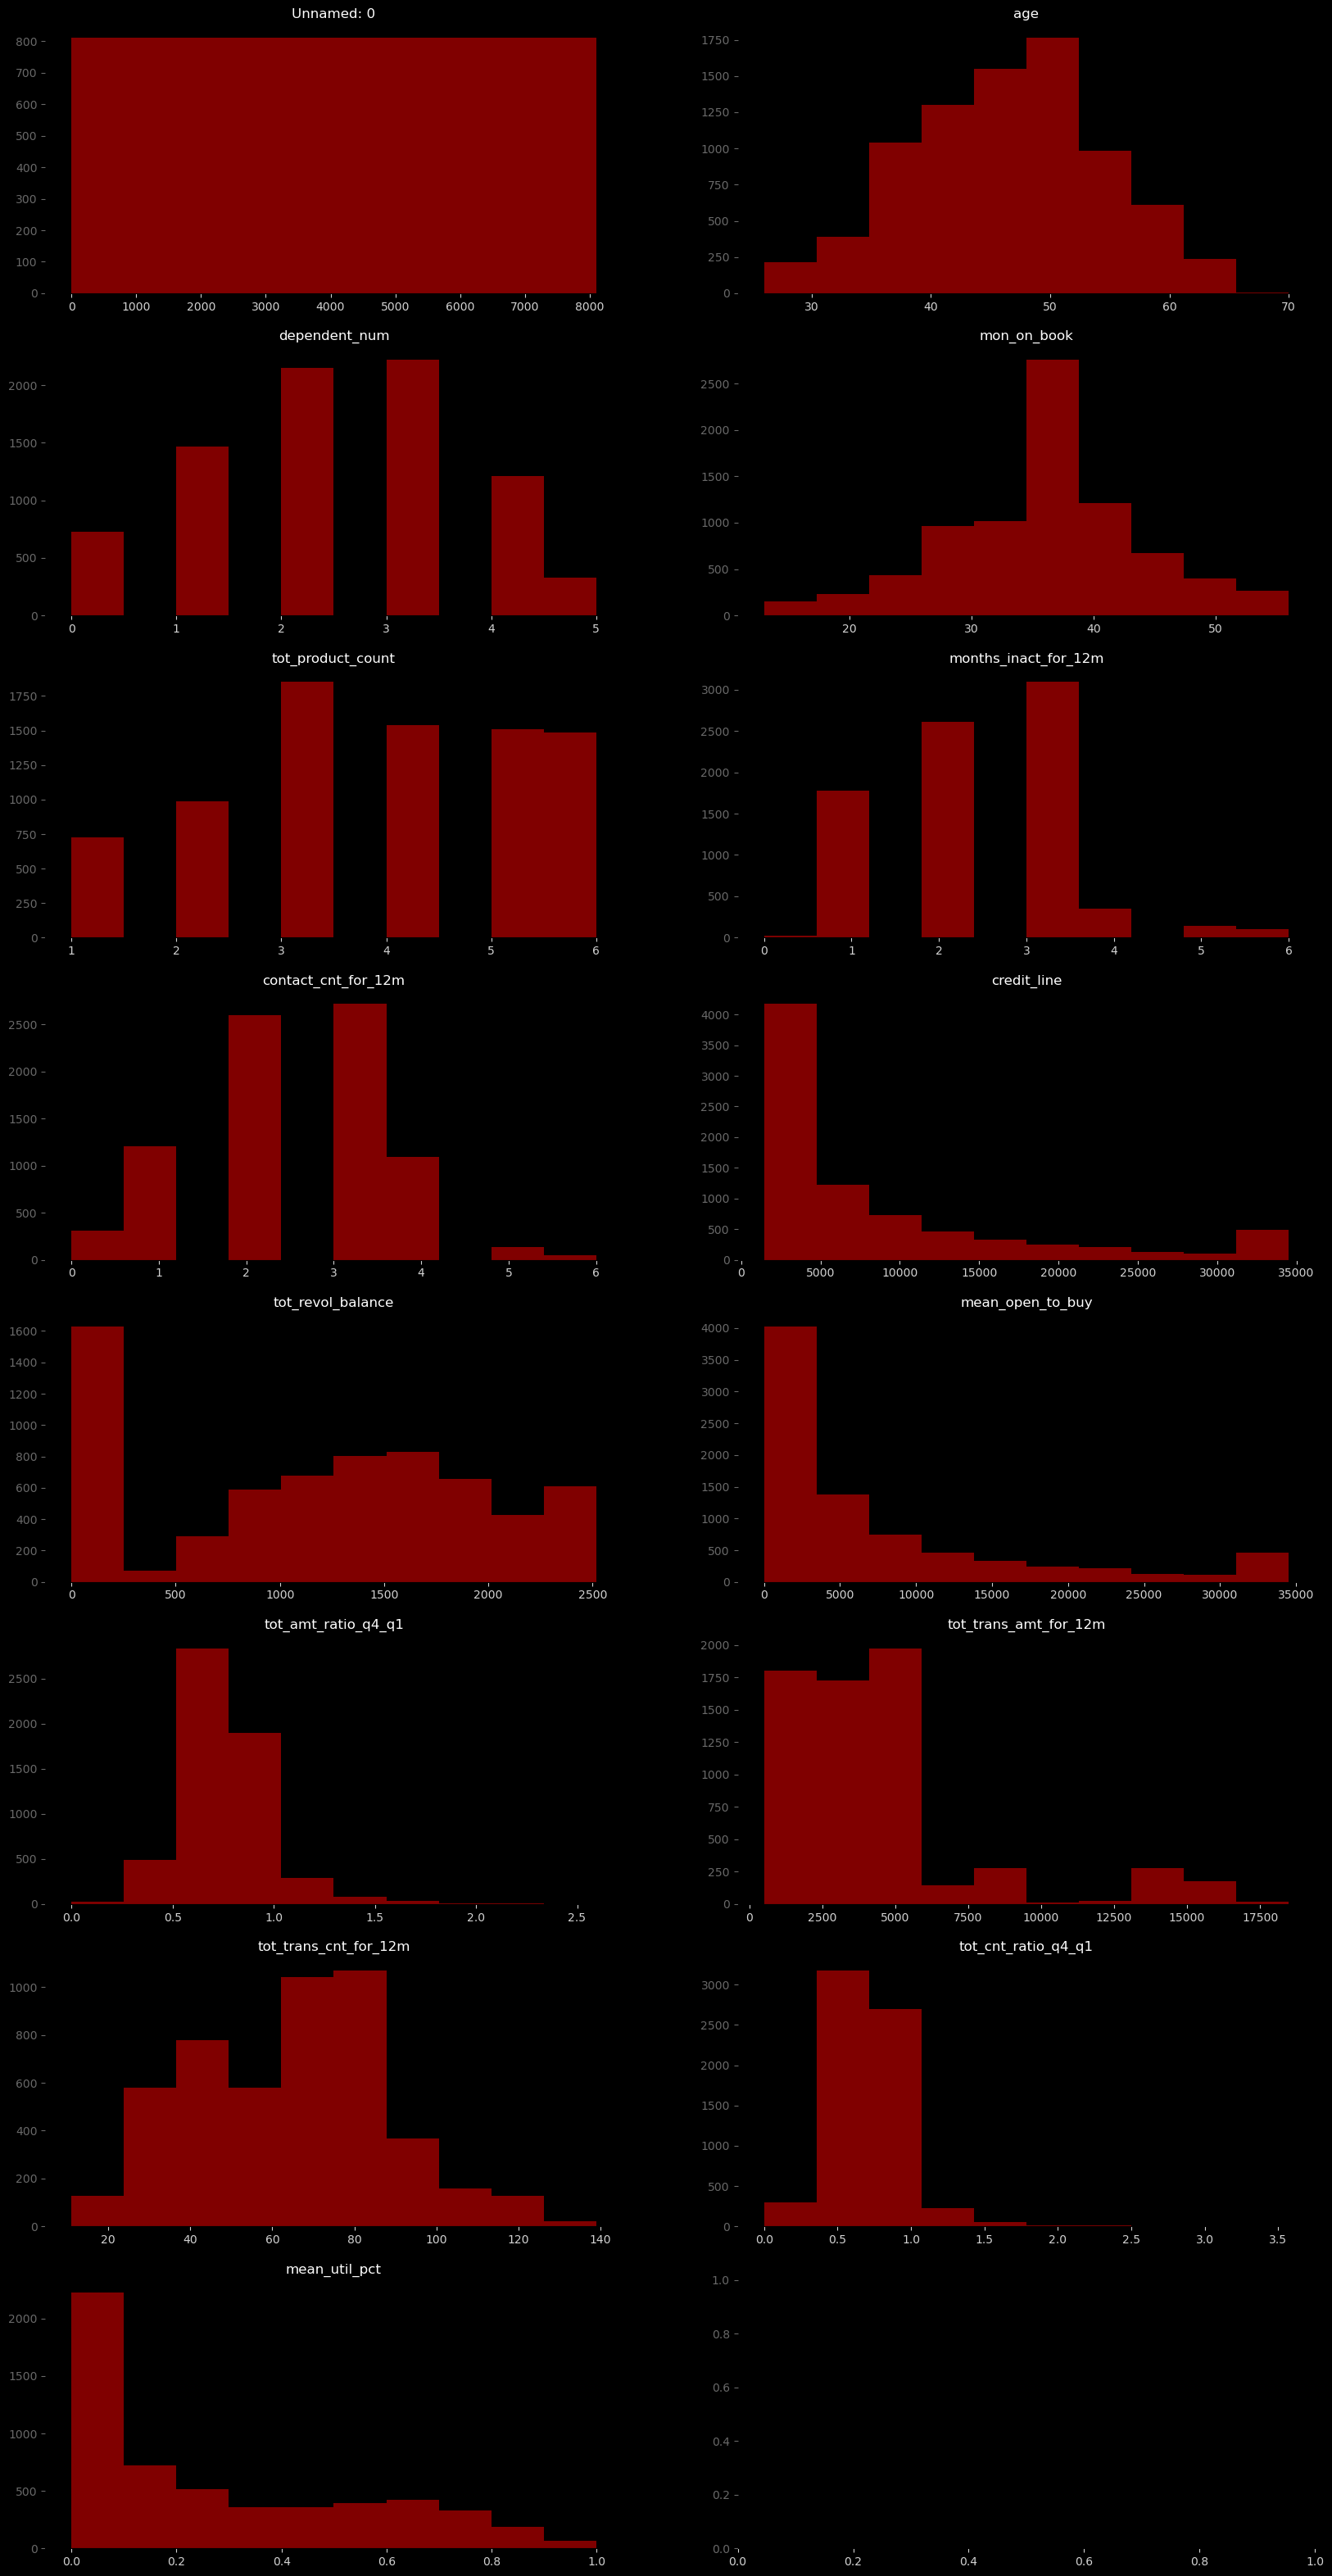

In [21]:
sns.set_style(rc=custom_params)
cfig, ax = plt.subplots(8,2,figsize=(20, 40))
a=0
for col in NobjCol :
    a_1 = a%2
    a_2 = a//2
    ax[a_2,a_1].hist(df[col],color='maroon') 
    ax[a_2,a_1].set_title(col)
    a +=1

### <span style="color:maroon;background-color:white"> <b># null처리</b>  [수치형]

In [22]:
nullNObjCol

['tot_revol_balance',
 'tot_amt_ratio_q4_q1',
 'tot_trans_amt_for_12m',
 'tot_trans_cnt_for_12m',
 'tot_cnt_ratio_q4_q1',
 'mean_util_pct']

##### ▷ 패키지 import

In [23]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [24]:
nullNObjDf = df[nullNObjCol]

In [25]:
LR = LinearRegression()
imputer = IterativeImputer(max_iter         = 20,
                           verbose          = 10,
                           random_state     = 0)
AnullNObjAr = imputer.fit_transform(nullNObjDf)

[IterativeImputer] Completing matrix with shape (8101, 6)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.02
[IterativeImputer] Change: 8004.631605849304, scaled tolerance: 18.484 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.03
[IterativeImputer] Change: 2883.9768016177923, scaled tolerance: 18.484 
[IterativeImputer] Ending imputation round 3/20, elapsed time 0.04
[IterativeImputer] Change: 933.5521954686282, scaled tolerance: 18.484 
[IterativeImputer] Ending imputation round 4/20, elapsed time 0.06
[IterativeImputer] Change: 574.045073424928, scaled tolerance: 18.484 
[IterativeImputer] Ending imputation round 5/20, elapsed time 0.07
[IterativeImputer] Change: 453.7223212041654, scaled tolerance: 18.484 
[IterativeImputer] Ending imputation round 6/20, elapsed time 0.08
[IterativeImputer] Change: 308.90202711684015, scaled tolerance: 18.484 
[IterativeImputer] Ending imputation round 7/20, elapsed time 0.10
[IterativeImputer] Change: 247.677235313

In [26]:
AnullNObjDf = pd.DataFrame(AnullNObjAr)
AnullNObjDf.columns = nullNObjDf.columns.to_list()

In [27]:
df = pd.concat([df[[col for col in df.columns if col not in nullNObjCol]],AnullNObjDf],axis=1)

In [28]:
df[nullNObjCol].isna().groupby(nullNObjCol).sum()

,,,,,
tot_revol_balance,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
False,False,False,False,False,False


### <span style="color:maroon;background-color:white"> <b># 추가EDA </b> [수치형]

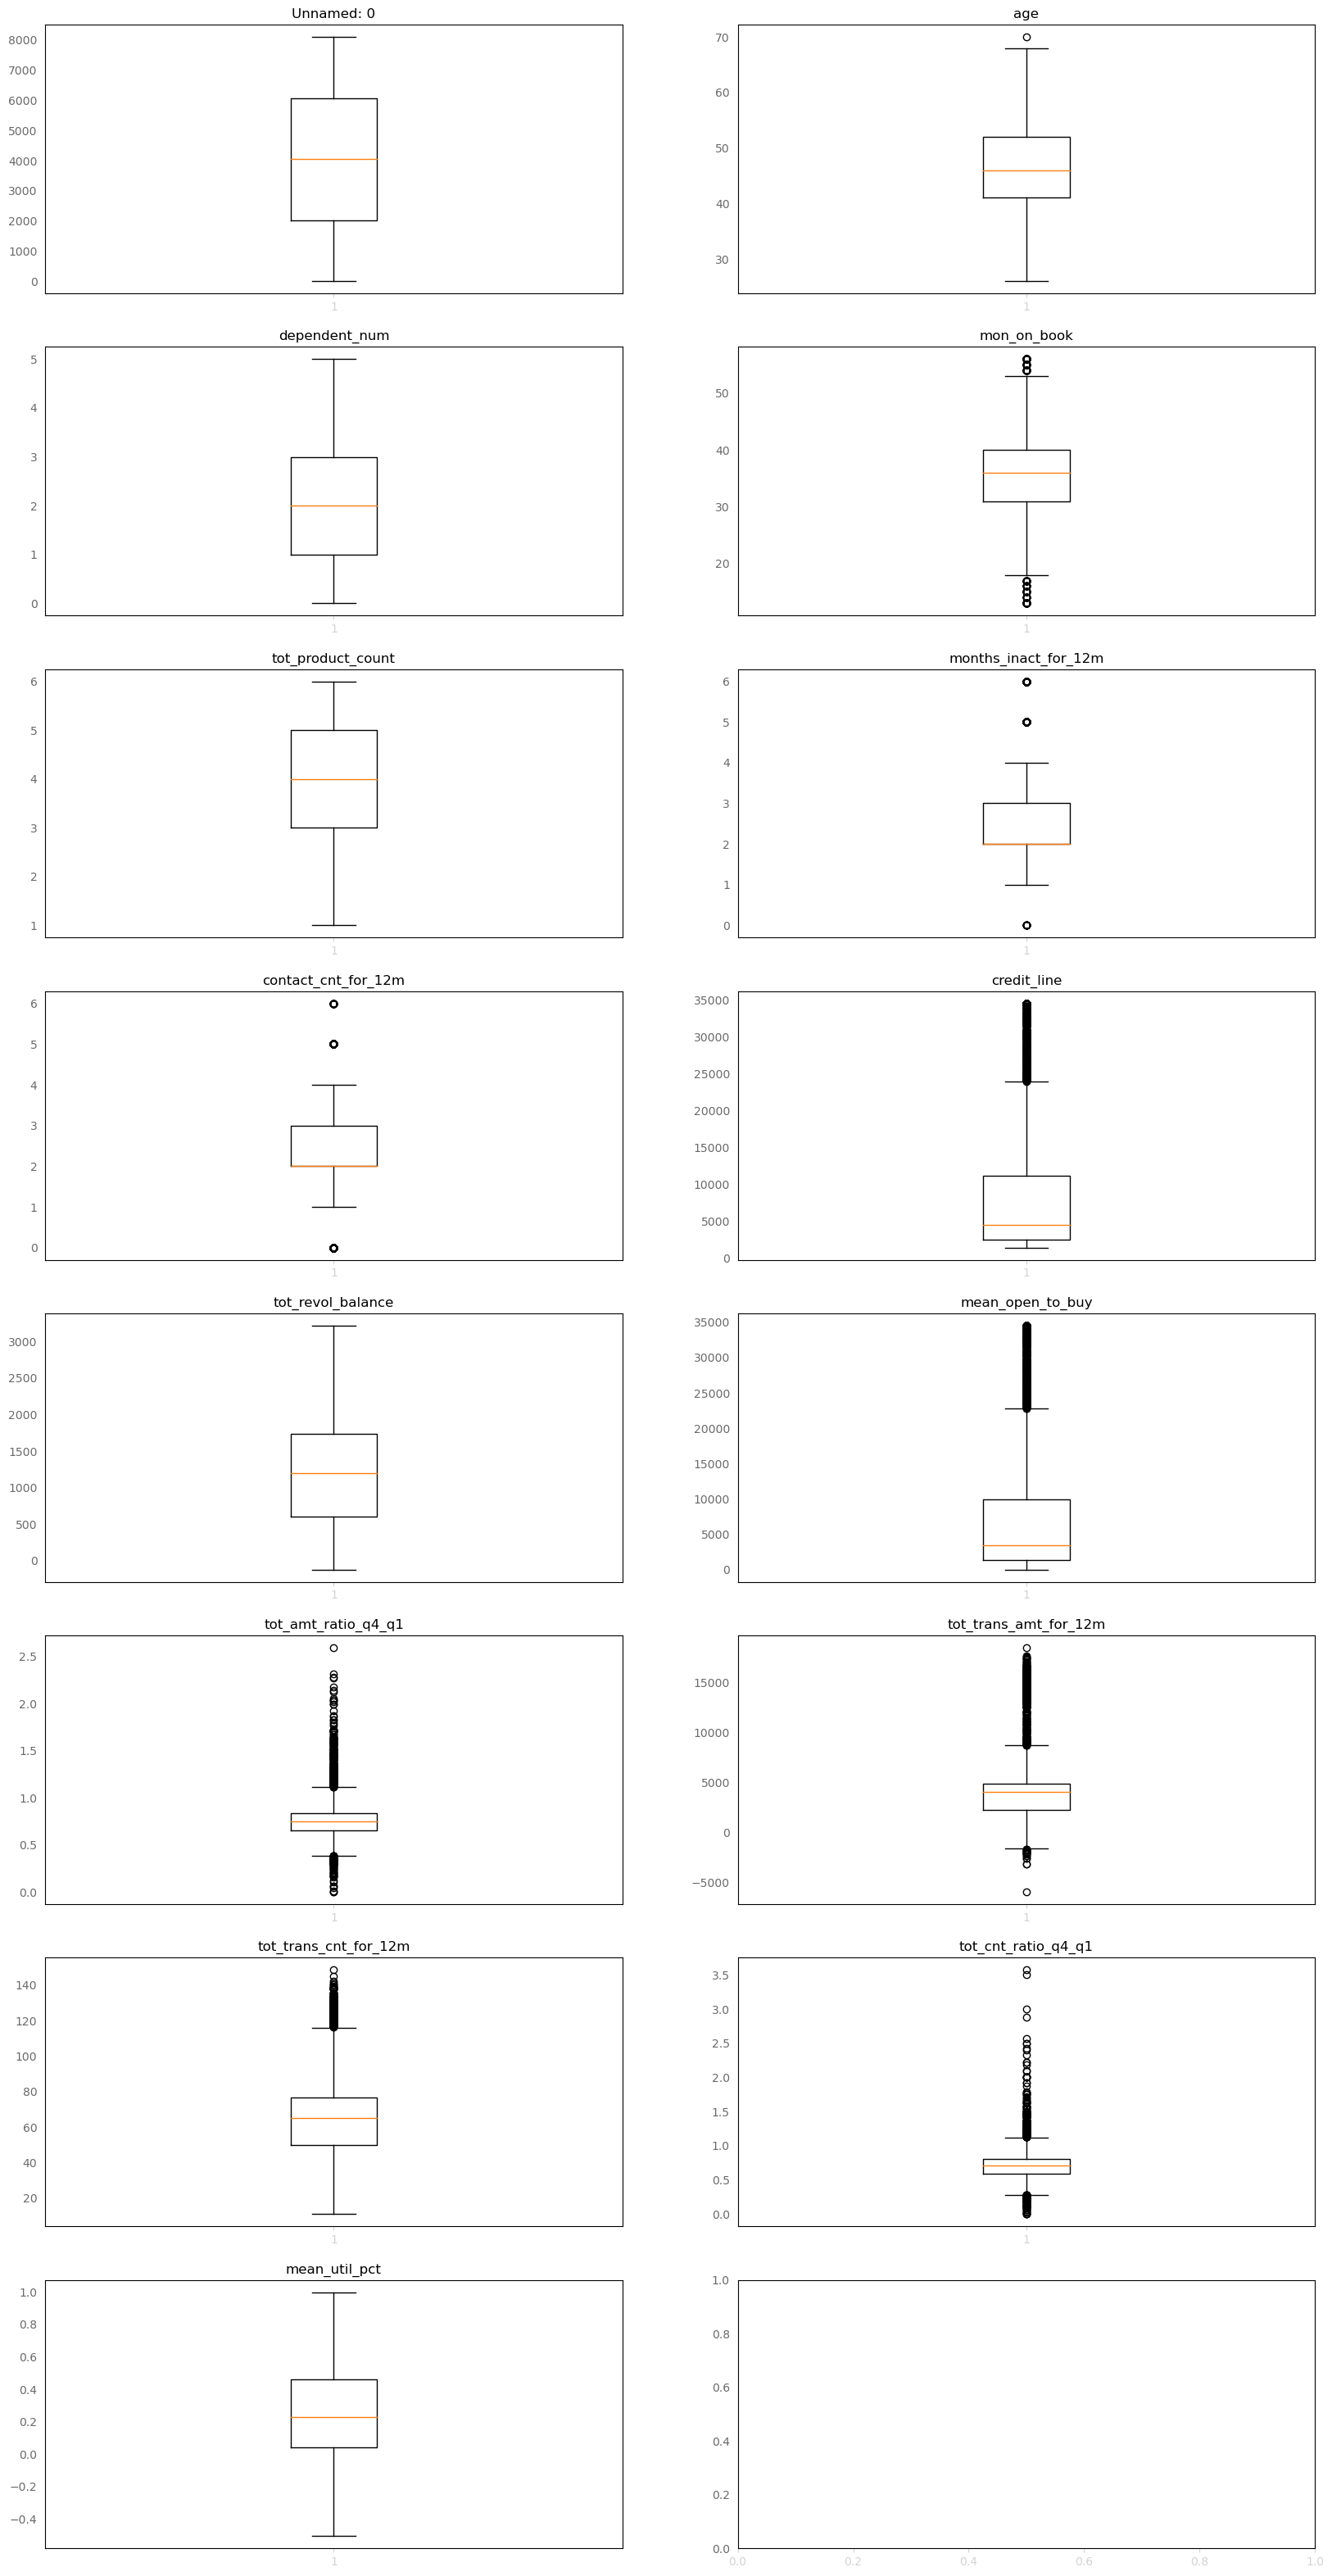

In [30]:
sns.set_style(rc=custom_params_box)
fig, ax = plt.subplots(8,2,figsize=(20, 40))
a=0
for col in NobjCol :
    a_1 = a%2
    a_2 = a//2
    ax[a_2,a_1].boxplot(df[col])
    ax[a_2,a_1].set_title(col)
    a +=1

<span style="color:firebrick;background-color:white"> → credit_line, mean_open_to_buy, tot_trans_amt_for_12m 좌측으로 치우침 》》 log변환 

### <span style="color:maroon;background-color:white"> <b># EDA </b> [명목형]

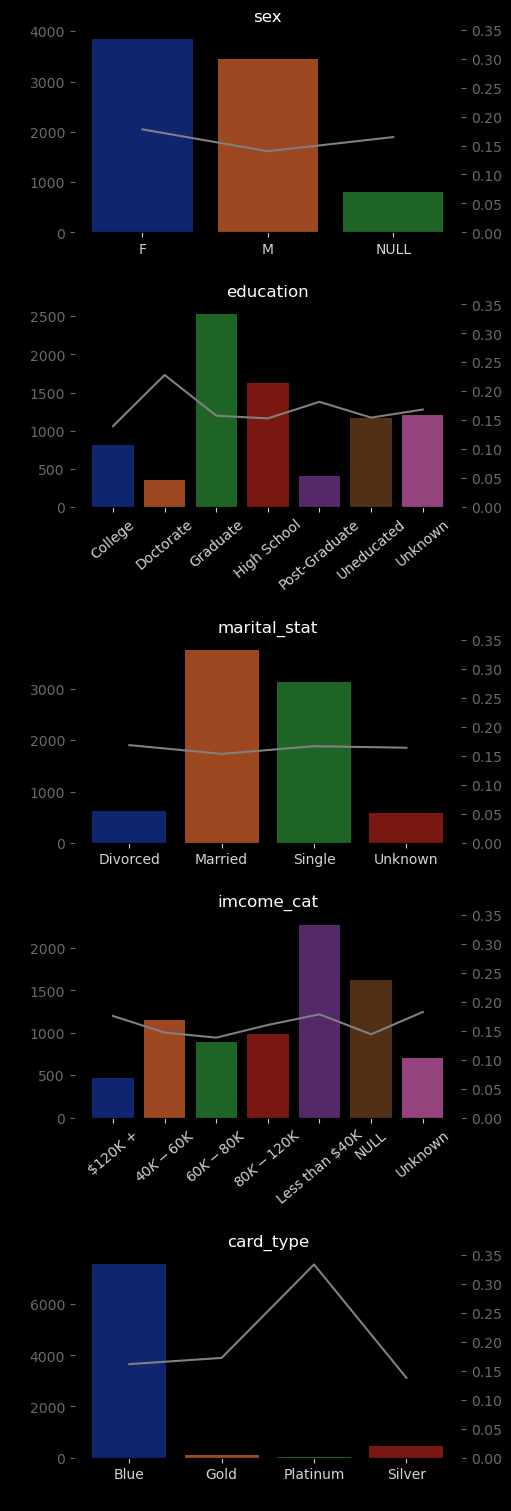

In [31]:
sns.set_style(rc=custom_params)
fig, ax = plt.subplots(5,1,figsize =(5,15),constrained_layout=True)

x_ = 0
for col in objCol:
    a = sns.countplot(x       = col,
                      data    = EDA,
                      order   = EDA.groupby(col)[yCol].sum().index,
                      ax      = ax[x_],
                      palette = 'dark'
                      )
    a.set(title=col)
    if col in ['education','imcome_cat']:
        a.set_xticklabels(a.get_xticklabels(),rotation = 40)
    
    ax2 = ax[x_].twinx()
    ax2.plot(EDA.groupby(col)[yCol].sum()/EDA.groupby(col)[yCol].count(),color='gray')
    plt.ylim([0,0.35])
    x_ +=1
    
plt.show()       

### <span style="color:maroon;background-color:white"> <b># null처리</b>  [명목형]

In [32]:
nullObjCol

['sex', 'imcome_cat']

#### <span style="background-color:maroon"> <b> ① sex

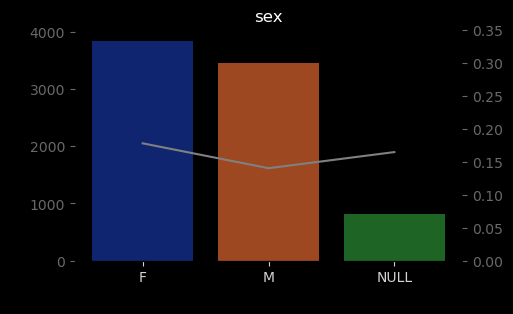

In [33]:
obj_graph(EDA,'sex')

In [34]:
print(df[df['sex'] =='M']['is_churned'].sum())
print(df[df['sex'] =='F']['is_churned'].sum())
print(df[df['sex'] =='M']['is_churned'].count())
print(df[df['sex'] =='F']['is_churned'].count())
print(df[df['sex'] =='M']['is_churned'].sum()/df[df['sex'] =='M']['is_churned'].count())
print(df[df['sex'] =='F']['is_churned'].sum()/df[df['sex'] =='F']['is_churned'].count())

484
683
3453
3840
0.14016796988126268
0.17786458333333333


<span style="color:firebrick;background-color:white"> → 성별에 따라 꽤 유의한 차이를 보이므로 null을 채워 모델에 적용 예정

In [35]:
sum(df['sex'].isna())/len(df['sex'])*100

9.974077274410567

<span style="color:firebrick;background-color:white"> → null값 10% 미만으로 다른 null이 없는 컬럼 활용 모델링

##### ▷ 모델링 패키지 import

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
import lightgbm as lgb

##### ▷ 모델링용 df 생성

In [37]:
sexDf = df[[col for col in xCol if col != 'sex']]
sexDf = pd.get_dummies(sexDf)
sexDf = pd.concat([df[[keyCol,yCol]],sexDf,df['sex']],axis=1)

In [38]:
trainX_ = sexDf[sexDf['sex'].isna()==False].drop(columns='sex').reset_index(drop=1)
trainY_ = sexDf[sexDf['sex'].isna()==False]['sex'].reset_index(drop=1)

testX_ = sexDf[sexDf['sex'].isna()].drop(columns='sex').reset_index(drop=1)

In [39]:
trainX = trainX_.drop(columns=keyCol)
trainY = trainY_.drop(columns=keyCol)
testX  = testX_.drop(columns=keyCol)

▷ lgbm 활용하여 sex 컬럼 fill

In [40]:
LG = lgb.LGBMClassifier(random_state = 0,learning_rate=0.001, n_estimators=100000,max_depth=9)
LG.fit(trainX,trainY)

testY   = LG.predict(testX)
testY   = pd.DataFrame(testY,columns=['sex'])

fillSex = pd.concat([testX_[[keyCol]],testY],axis=1)
fillSex.columns = ['cstno','sex_tmp']

[LightGBM] [Fatal] Do not support special JSON characters in feature name.


LightGBMError: Do not support special JSON characters in feature name.

##### ▷ 성능확인

In [41]:
tmp = pd.concat([testX,testY],axis=1)
tmp = pd.concat([sexDf[sexDf['sex'].isna()==False].iloc[:,1:],tmp]).reset_index(drop=1)
tmp = pd.get_dummies(tmp)

y = tmp['is_churned'].astype('str')
X = tmp.drop(columns='is_churned')
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size    = 0.2,
                                                    random_state = 0,
                                                    stratify     = y)

LG = lgb.LGBMClassifier(learning_rate=0.001, n_estimators=100000,max_depth=9)
LG.fit(X_train,y_train)
y_pred = LG.predict(X_test)
roc_auc_score(y_test,y_pred)

NameError: name 'testY' is not defined

In [36]:
df = df.merge(fillSex,on='cstno',how='left')
df.loc[df.sex.isna(),'sex'] = df.sex_tmp
df.drop(columns='sex_tmp',inplace=True)

In [37]:
df.sex.value_counts()

F    4298
M    3803
Name: sex, dtype: int64

<span style="color:firebrick;background-color:white"> → sex 컬럼 null값 LGBM으로 채움 (fillSex)

#### <span style="background-color:maroon"> <B> ② income_cat

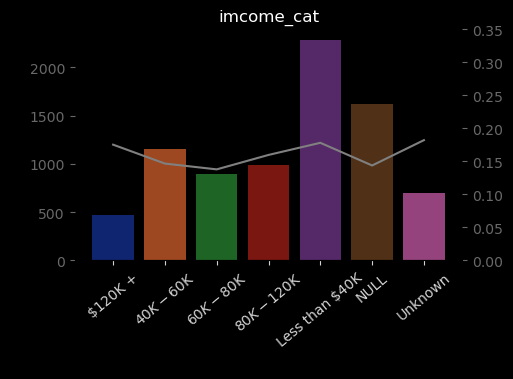

In [38]:
obj_graph(EDA,'imcome_cat')

In [39]:
EDA.imcome_cat.value_counts()

Less than $40K    2277
NULL              1619
$40K - $60K       1151
$80K - $120K       988
$60K - $80K        891
Unknown            702
$120K +            473
Name: imcome_cat, dtype: int64

##### ▷ labeling  
- 'unkown' labeling을 위한 분포확인

In [40]:
df.groupby('imcome_cat')[NnullCol].describe()

age                                                     \
                 count       mean       std   min   25%   50%   75%   max   
imcome_cat                                                                  
$120K +          473.0  47.672304  6.739745  26.0  43.0  49.0  53.0  61.0   
$40K - $60K     1151.0  46.251086  8.522320  26.0  40.0  46.0  52.0  67.0   
$60K - $80K      891.0  45.722783  7.519901  26.0  41.0  45.0  50.0  63.0   
$80K - $120K     988.0  46.502024  6.892943  29.0  41.0  47.0  52.0  63.0   
Less than $40K  2277.0  46.097936  8.443994  26.0  40.0  46.0  52.0  70.0   
Unknown          702.0  46.310541  8.568288  26.0  41.0  47.0  52.0  67.0   

               dependent_num                                               \
                       count      mean       std  min  25%  50%  75%  max   
imcome_cat                                                                  
$120K +                473.0  2.479915  1.155366  0.0  2.0  2.0  3.0  5.0   
$40K - $60K           1151.0  2.286707  1.315257  0.0  1.0  2.0  3.0  5.0   
$60K - $80K            891.0  2.424242  1.279763  0.0  2.0  2.0  3.0  5.0   
$80K - $120K           988.0  2.465587  1.199388  0.0  2.0  3.0  3.0  5.0   
Less than $40K        2277.0  2.267457  1.330677  0.0  1.0  2.0  3.0  5.0   
Unknown                702.0  2.264957  1.342129  0.0  1.0  2.0  3.0  5.0   

               mon_on_book                                                     \
                     count       mean       std   min   25%   50%   75%   max   
imcome_cat                                                                      
$120K +              473.0  36.909091  7.276776  13.0  33.0  36.0  42.0  54.0   
$40K - $60K         1151.0  36.072980  8.518924  13.0  31.0  36.0  41.0  56.0   
$60K - $80K          891.0  35.397306  7.521905  13.0  31.0  36.0  39.0  56.0   
$80K - $120K         988.0  36.036437  7.114684  13.0  32.0  36.0  40.0  56.0   
Less than $40K      2277.0  35.733860  8.308388  13.0  31.0  36.0  40.0  56.0   
Unknown              702.0  35.713675  8.294804  13.0  31.0  36.0  40.0  56.0   

               tot_product_count                                               \
                           count      mean       std  min  25%  50%  75%  max   
imcome_cat                                                                      
$120K +                    473.0  3.822410  1.585877  1.0  3.0  4.0  5.0  6.0   
$40K - $60K               1151.0  3.765421  1.517052  1.0  3.0  4.0  5.0  6.0   
$60K - $80K                891.0  3.829405  1.544133  1.0  3.0  4.0  5.0  6.0   
$80K - $120K               988.0  3.818826  1.580841  1.0  3.0  4.0  5.0  6.0   
Less than $40K            2277.0  3.836627  1.546472  1.0  3.0  4.0  5.0  6.0   
Unknown                    702.0  3.769231  1.575768  1.0  3.0  4.0  5.0  6.0   

               months_inact_for_12m                                          \
                              count      mean       std  min  25%  50%  75%   
imcome_cat                                                                    
$120K +                       473.0  2.321353  0.960176  0.0  2.0  2.0  3.0   
$40K - $60K                  1151.0  2.293658  1.007254  0.0  2.0  2.0  3.0   
$60K - $80K                   891.0  2.312009  0.976845  0.0  2.0  2.0  3.0   
$80K - $120K                  988.0  2.344130  0.973299  0.0  2.0  2.0  3.0   
Less than $40K               2277.0  2.404480  1.041003  0.0  2.0  2.0  3.0   
Unknown                       702.0  2.346154  1.059489  0.0  2.0  2.0  3.0   

                    contact_cnt_for_12m                                     \
                max               count      mean       std  min  25%  50%   
imcome_cat                                                                   
$120K +         6.0               473.0  2.513742  1.155459  0.0  2.0  3.0   
$40K - $60K     6.0              1151.0  2.452650  1.088745  0.0  2.0  2.0   
$60K - $80K     6.0               891.0  2.493827  1.099906  0.0  2.0

<span style="color:firebrick;background-color:white"> → credit_line, mean_open_to_buy로 봤을 때 unknown은 '$60K - $80K'과 분포 비슷 》 labeling시 4로 줌

In [41]:
lbIncomeCat = {'Less than $40K' : 1,
               '$40K - $60K'    : 2,
               '$60K - $80K'    : 3,
               'Unknown'        : 4,   # <- here (위에서 null처리시 확인함.)
               '$80K - $120K'   : 5,
               '$120K +'        : 6
               }

In [42]:
tmp = df[~(df.imcome_cat.isna())].reset_index(drop=1)
tmp['labIncomeCat'] = tmp['imcome_cat'].apply(lambda x : lbIncomeCat[x])

In [43]:
for col in NobjCol:
    a = round(tmp.loc[:,['labIncomeCat',f'{col}']].corr().iloc[1,0],3)
    print(col, ':',a)

age : 0.037
dependent_num : 0.055
mon_on_book : 0.024
tot_product_count : -0.004
months_inact_for_12m : -0.021
contact_cnt_for_12m : 0.027
credit_line : 0.561
tot_revol_balance : -0.021
mean_open_to_buy : 0.559
tot_amt_ratio_q4_q1 : 0.001
tot_trans_amt_for_12m : 0.02
tot_trans_cnt_for_12m : -0.052
tot_cnt_ratio_q4_q1 : -0.005
mean_util_pct : -0.247


<span style="color:firebrick;background-color:white"> → 2개 이상의 상관관계가가 있는 column 존재 (credit_line,mean_open_to_buy, mean_util_pct)

<span style="color:firebrick;background-color:white"> → income_cat fillna용 모델 생성

##### ▷ 모델링용 df 생성

In [44]:
incomDf = df[[col for col in xCol if col != 'imcome_cat']]
incomDf = pd.get_dummies(incomDf)
incomDf = pd.concat([df[[keyCol,yCol]],incomDf,df['imcome_cat']],axis=1)

In [45]:
trainX_ = incomDf[incomDf['imcome_cat'].isna()==False].drop(columns='imcome_cat').reset_index(drop=1)
trainY_ = incomDf[incomDf['imcome_cat'].isna()==False]['imcome_cat'].reset_index(drop=1)

testX_ = incomDf[incomDf['imcome_cat'].isna()].drop(columns='imcome_cat').reset_index(drop=1)

In [46]:
trainX = trainX_.drop(columns=keyCol)
trainY = trainY_.drop(columns=keyCol)
testX  = testX_.drop(columns=keyCol)

##### ▷ lgbm 활용하여 fillna

In [47]:
LG = lgb.LGBMClassifier(learning_rate=0.001, n_estimators=10000,max_depth=9)
LG.fit(trainX,trainY)

testY   = LG.predict(testX)
testY   = pd.DataFrame(testY,columns=['imcome_cat'])

fillIncom = pd.concat([testX_[[keyCol]],testY],axis=1)
fillIncom.columns = ['cstno','income_cat_tmp']

In [48]:
fillIncom

,cstno,income_cat_tmp
0,708117933,Less than $40K
1,708129933,Less than $40K
2,708161133,$60K - $80K
3,708176208,Unknown
4,708177333,Less than $40K
...,...,...
1614,827436483,Less than $40K
1615,827628408,$60K - $80K
1616,827695683,$120K +
1617,827964858,Less than $40K


##### ▷ 성능확인

In [49]:
tmp = pd.concat([testX,testY],axis=1)
tmp = pd.concat([incomDf[incomDf['imcome_cat'].isna()==False].iloc[:,1:],tmp]).reset_index(drop=1)
tmp = pd.get_dummies(tmp)

y = tmp['is_churned'].astype('str')
X = tmp.drop(columns='is_churned')
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size    = 0.2,
                                                    random_state = 42,
                                                    stratify     = y)

LG = lgb.LGBMClassifier(learning_rate=0.001, n_estimators=10000,max_depth=9)
LG.fit(X_train,y_train)
y_pred = LG.predict(X_test)
roc_auc_score(y_test,y_pred)

0.8438407844910417

In [50]:
df = df.merge(fillIncom,on='cstno',how='left')
df.loc[df.imcome_cat.isna(),'imcome_cat'] = df.income_cat_tmp
df.drop(columns='income_cat_tmp',inplace=True)

In [51]:
df.imcome_cat.value_counts()

Less than $40K    3020
$80K - $120K      1303
$40K - $60K       1300
$60K - $80K       1147
Unknown            793
$120K +            538
Name: imcome_cat, dtype: int64

In [52]:
sum(df.imcome_cat.isna())

0

## <span style="color:maroon;background-color:white"> <b>ⅱ. 추가 처리  </b>

### <span style="color:maroon;background-color:white"> <b># log변환</b>  [수치형]
<span style="color:firebrick;background-color:white"> → credit_line, mean_open_to_buy, tot_trans_amt_for_12m 좌측으로 치우침 》》 log변환 

In [53]:
log_col = ['credit_line','mean_open_to_buy','tot_trans_amt_for_12m']

<span style="color:firebrick;background-color:white"> → tot_trans_amt_for_12m(최근12개월 동안의 거래금액)이 0보다 작은 경우 이전거래에 대한 취소 건으로 예상, 무시하기로함( 0.01주고 변환 )

In [54]:
for col in log_col:
    df.loc[df[col]<=0,col]=0.01
    df[col] = np.log(df[col])

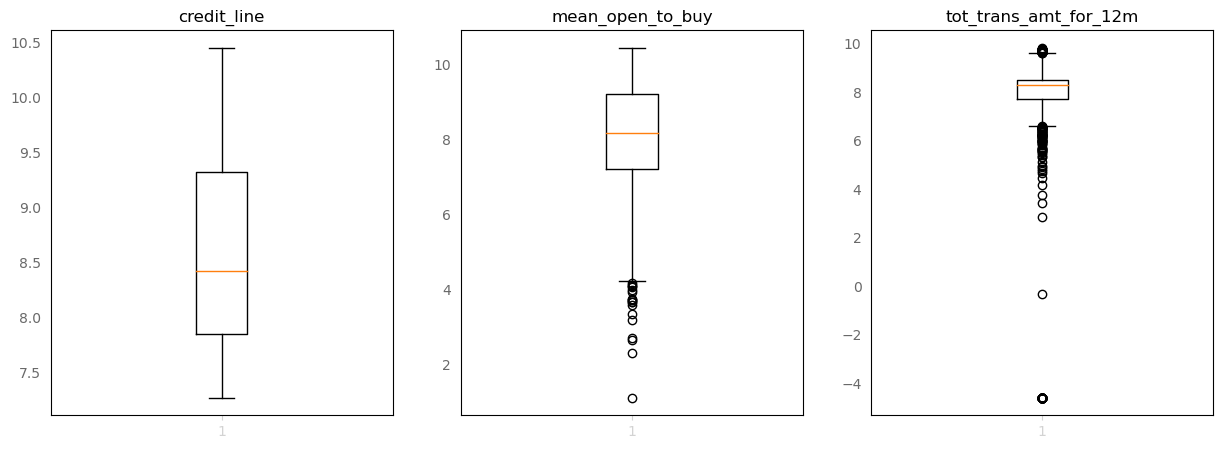

In [55]:
sns.set_style(rc=custom_params_box)
fig, ax = plt.subplots(1,3,figsize=(15,5))
_x=0
for col in log_col:
    ax[_x].boxplot(df[col])
    ax[_x].set_title(col)
    _x +=1

### <span style="color:maroon;background-color:white"> <b># labeling</b> [명목형_순서형]  
- sex, education,imcome_cat, card_type

##### ▷ 'unkown' labeling을 위한 분포확인

In [56]:
df.groupby('education')[NnullCol].describe()

age                                                     \
                count       mean       std   min   25%   50%   75%   max   
education                                                                  
College         816.0  46.058824  8.145997  26.0  41.0  46.0  52.0  65.0   
Doctorate       355.0  47.354930  7.308241  32.0  42.0  47.0  52.0  65.0   
Graduate       2528.0  46.263054  8.064345  26.0  41.0  46.0  52.0  68.0   
High School    1619.0  46.172946  8.187904  26.0  40.0  46.0  52.0  70.0   
Post-Graduate   407.0  45.570025  8.112472  26.0  40.0  47.0  51.0  65.0   
Uneducated     1171.0  46.444065  7.955060  26.0  41.0  47.0  52.0  65.0   
Unknown        1205.0  46.550207  7.838285  26.0  41.0  47.0  51.0  67.0   

              dependent_num                                               \
                      count      mean       std  min  25%  50%  75%  max   
education                                                                  
College               816.0  2.341912  1.233284  0.0  1.0  2.0  3.0  5.0   
Doctorate             355.0  2.312676  1.315158  0.0  1.0  2.0  3.0  5.0   
Graduate             2528.0  2.329905  1.287494  0.0  1.0  2.0  3.0  5.0   
High School          1619.0  2.294626  1.282781  0.0  1.0  2.0  3.0  5.0   
Post-Graduate         407.0  2.412776  1.343341  0.0  2.0  2.0  3.0  5.0   
Uneducated           1171.0  2.343296  1.295619  0.0  1.0  2.0  3.0  5.0   
Unknown              1205.0  2.365975  1.309182  0.0  1.0  2.0  3.0  5.0   

              mon_on_book                                                     \
                    count       mean       std   min   25%   50%   75%   max   
education                                                                      
College             816.0  35.873775  8.182579  13.0  32.0  36.0  41.0  56.0   
Doctorate           355.0  36.740845  7.473901  13.0  32.5  36.0  41.0  56.0   
Graduate           2528.0  35.977057  8.124103  13.0  31.0  36.0  40.0  56.0   
High School        1619.0  35.744287  8.044458  13.0  31.0  36.0  40.0  56.0   
Post-Graduate       407.0  35.226044  7.969338  13.0  30.0  36.0  40.0  56.0   
Uneducated         1171.0  35.958155  8.004323  13.0  31.0  36.0  40.0  56.0   
Unknown            1205.0  36.047303  7.864419  13.0  32.0  36.0  41.0  56.0   

              tot_product_count                                               \
                          count      mean       std  min  25%  50%  75%  max   
education                                                                      
College                   816.0  3.767157  1.533175  1.0  3.0  4.0  5.0  6.0   
Doctorate                 355.0  3.723944  1.552241  1.0  3.0  4.0  5.0  6.0   
Graduate                 2528.0  3.832674  1.540666  1.0  3.0  4.0  5.0  6.0   
High School              1619.0  3.804818  1.528130  1.0  3.0  4.0  5.0  6.0   
Post-Graduate             407.0  3.859951  1.540118  1.0  3.0  4.0  5.0  6.0   
Uneducated               1171.0  3.823228  1.579356  1.0  3.0  4.0  5.0  6.0   
Unknown                  1205.0  3.815768  1.597626  1.0  3.0  4.0  5.0  6.0   

              months_inact_for_12m                                          \
                             count      mean       std  min  25%  50%  75%   
education                                                                    
College                      816.0  2.360294  0.984589  0.0  2.0  2.0  3.0   
Doctorate                    355.0  2.374648  1.004470  0.0  2.0  2.0  3.0   
Graduate                    2528.0  2.364320  1.028956  0.0  2.0  2.0  3.0   
High School                 1619.0  2.326745  0.988860  0.0  2.0  2.0  3.0   
Post-Graduate                407.0  2.331695  1.000272  0.0  2.0  2.0  3.0   
Uneducated                  1171.0  2.358668  1.008239  0.0  2.0  2.0  3.0   
Unknown                     1205.0  2.313693  1.050006  0.0  2.0  2.0  3.0   

                   contact_cnt_for_12m                                     \
               max               cou

<span style="color:firebrick;background-color:white"> → credit_line, mean_open_to_buy로 봤을 때 unknown은 'Doctorate'와 분포 비슷 》 labeling시 6으로 줌

In [57]:
lbSex = {'F' : 1,
         'M' : 0
         }

lbEducation = {'Uneducated'    : 1,
               'High School'   : 2,
               'College'       : 3,
               'Graduate'      : 4,
               'Post-Graduate' : 5,
               'Unknown'       : 6,    # <-here
               'Doctorate'     : 7     
               }

lbIncomeCat = {'Less than $40K' : 1,
               '$40K - $60K'    : 2,
               '$60K - $80K'    : 3,
               'Unknown'        : 4,   # <- here (위에서 null처리시 확인함.)
               '$80K - $120K'   : 5,
               '$120K +'        : 6
               }

lbCardType  = {'Blue'     : 1,
               'Silver'   : 2,
               'Gold'     : 3,
               'Platinum' : 4
               } 

In [58]:
df['sex']        = df['sex'].apply(lambda x : lbSex[x])
df['education']  = df['education'].apply(lambda x : lbEducation[x])
df['imcome_cat'] = df['imcome_cat'].apply(lambda x : lbIncomeCat[x])
df['card_type']  = df['card_type'].apply(lambda x : lbCardType[x])

### <span style="color:maroon;background-color:white"> <b># OneHotEncoding</b> [명목형]  
- marital_stat

In [59]:
df = pd.get_dummies(df,columns = ['marital_stat'])

for col in df.select_dtypes('uint8').columns :
    df[f'{col}'] = df[f'{col}'].astype('int64')

### <span style="color:maroon;background-color:white"> <b># 컬럽합치기</b>  
- corr높음

In [60]:
round(tmp.loc[:,['credit_line','mean_open_to_buy']].corr().iloc[1,0],3)

0.996

In [61]:
df.credit_line.describe()

count    8101.000000
mean        8.603023
std         0.935298
min         7.271217
25%         7.845808
50%         8.422663
75%         9.317220
max        10.449178
Name: credit_line, dtype: float64

In [62]:
df.mean_open_to_buy.describe()

count    8101.000000
mean        8.167391
std         1.308559
min         1.098612
25%         7.201171
50%         8.159089
75%         9.204523
max        10.449178
Name: mean_open_to_buy, dtype: float64

In [63]:
df['new'] = round((df.credit_line+df.mean_open_to_buy)/2,0).astype('int64')

# <span style="color:maroon;background-color:white"> <b>Ⅱ. OverSampling & Modeling </b>

## <span style="color:maroon;background-color:white"> <b>ⅰ. Split & OverSampling  </b>

In [64]:
# !pip install imblearn

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
df.drop(columns=keyCol,inplace=True)

In [67]:
yCol    = 'is_churned'
xCol    = [col for col in df.columns if col not in (yCol)]

In [68]:
# yCol    = 'is_churned'
# xCol    = [col for col in df.columns if col not in ('credit_line','mean_open_to_buy',yCol)]

In [69]:
# yCol    = 'is_churned'
# xCol    =['tot_product_count',
#           'months_inact_for_12m',
#           'contact_cnt_for_12m',
#           'tot_revol_balance',
#           'tot_amt_ratio_q4_q1',
#           'tot_trans_amt_for_12m',
#           'tot_trans_cnt_for_12m',
#           'tot_cnt_ratio_q4_q1',
#           'mean_util_pct' 
#          ]

In [70]:
y = df['is_churned']
X = df.drop(columns='is_churned')
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size    = 0.2,
                                                    random_state = 0,
                                                    stratify     = y)

In [71]:
smote = SMOTE(random_state=1234)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

## <span style="color:maroon;background-color:white"> <b> ⅱ. Modeling  </b>

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
# from sklearn.neural_network import MLPClassifier as mlpc
# from sklearn.linear_model import LogisticRegression

In [73]:
# RF  = RandomForestClassifier(random_state=0,n_estimators =10000,max_depth=14)
# LGB = lgb.LGBMClassifier(random_state=0,learning_rate=0.001,n_estimators=10000,max_depth=14)
# XGB = xgb.XGBClassifier(random_state=0,learning_rate=0.001,n_estimators=10000)
# LR  = LogisticRegression(random_state=0,C=0.01,max_iter=300)
# MLP = mlpc(hidden_layer_sizes=(5,2),max_iter=300,activation = 'relu',solver = 'adam')

### <span style="color:maroon;background-color:white"> <b># RF</b>  

In [74]:
# %%time
# RF.fit(X_train_over,y_train_over)
# y_pred = RF.predict(X_test)
# roc_auc_score(y_test,y_pred)

Wall time: 2min 44s


0.8595475611823885

In [75]:
# y_pred = RF.predict(X_train)
# roc_auc_score(y_train,y_pred)

0.9964649321266968

### <span style="color:maroon;background-color:white"> <b># LGBM</b>  

In [76]:
# %%time
# LGB.fit(X_train_over,y_train_over)
# y_pred = LGB.predict(X_test)
# roc_auc_score(y_test,y_pred)

Wall time: 9.5 s


0.8836404227660657

In [77]:
# y_pred = LGB.predict(X_train)
# roc_auc_score(y_train,y_pred)

0.9754454185520363

### <span style="color:maroon;background-color:white"> <b># XGBoost</b>  

In [78]:
# %%time
# XGB.fit(X_train_over,y_train_over)
# y_pred = XGB.predict(X_test)
# roc_auc_score(y_test,y_pred)

Wall time: 1min 3s


0.882905668908608

In [79]:
# y_pred = XGB.predict(X_train)
# roc_auc_score(y_train,y_pred)

0.9696903280542986

### <span style="color:maroon;background-color:white"> <b># ★ Voting1 ★</b>  

In [80]:
# %%time
# VOTE = VotingClassifier(estimators = [('XGB',XGB),
#                                       ('LGB',LGB)],
#                         voting     = 'soft')
# VOTE.fit(X_train_over,y_train_over)
# y_pred = VOTE.predict(X_test)
# roc_auc_score(y_test,y_pred)

Wall time: 1min 10s


0.8855634996891426

In [81]:
# y_pred = VOTE.predict(X_train)
# roc_auc_score(y_train,y_pred)

0.9703124999999999

### <span style="color:maroon;background-color:white"> <b># Voting2</b>  

In [88]:
# %%time
# Vote = VotingClassifier(estimators = [('XGB',XGB),
#                                           ('LGB',LGB),
#                                           ('MLP',MLP)],
#                             voting     = 'soft')
# Vote.fit(X_train_over,y_train_over)
# y_pred = Vote.predict(X_test)
# roc_auc_score(y_test,y_pred)

Wall time: 1min 10s


0.8717345842988752

In [89]:
# y_pred = Vote.predict(X_train)
# roc_auc_score(y_train,y_pred)

0.9506363122171947

## <span style="color:maroon;background-color:white"> <b> → 최종 Model선택  </b>

In [86]:
LGB = lgb.LGBMClassifier(random_state=0,learning_rate=0.001,n_estimators=10000,max_depth=14)
XGB = xgb.XGBClassifier(random_state=0,learning_rate=0.001,n_estimators=10000)

In [87]:
%%time
JamModel = VotingClassifier(estimators = [('XGB',XGB),
                                          ('LGB',LGB)],
                            voting     = 'soft')
JamModel.fit(X_train_over,y_train_over)
y_pred = JamModel.predict(X_test)
roc_auc_score(y_test,y_pred)

Wall time: 1min 5s


0.8855634996891426

# <span style="color:maroon;background-color:white"> <b> ※ TEST Transform </b>

In [ ]:
test = ??

keyCol  = 'cstno'
yCol    = 'is_churned'
x_test  = [col for col in test.columns if col not in [keyCol,yCol]]
y_test  = test[[yCol]]

In [88]:
import j

In [94]:
x_test = j.w(x_test)

In [ ]:
y_pred = JamModel.predict(x_test)
roc_auc_score(y_test,y_pred)